## INFORMAÇÕES DO ALUNO

In [0]:
'''
SOFTWARES PARA USO EM CIÊNCIA DE DADOS II
PROJETO 02/02 - Beer Consumption
PROFESSOR: NASSER BOAN
ALUNO: ARTHUR FARIAS
MATRÍCULA: 1931133115
'''

# IMPORTANDO DATASET E BIBLIOTECAS

## Bibliotecas

In [0]:
## IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS NO PROJETO ##
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Comment this if the data visualisations doesn't work on your side
# %matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [3]:
# SE O GOOGLE DRIVE NÃO QUISER MONTAR
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Dataset

In [4]:
## IMPORTANDO A BASE E REALIZANDO OS TRATAMENTOS INICIAIS
df = pd.read_csv('/content/drive/My Drive/git/Beer_Consumption/data/Consumo_cerveja.csv',sep=',',encoding='iso-8859-1', dtype=str)
df.columns = [x.lower() for x in df.columns]
df_columns = df.columns
df.head(3)

,data,temperatura media (c),temperatura minima (c),temperatura maxima (c),precipitacao (mm),final de semana,consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814


In [5]:
# MELHORANDO O NOME DAS VARIÁVEIS
df.columns = ['data', 't_media', 't_minima', 't_maxima', 'precipitacao', 'fim_semana', 'consumo']
df_columns = df.columns
df.head(3)

,data,t_media,t_minima,t_maxima,precipitacao,fim_semana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814


In [0]:
# DICIONÁRIO DE DADOS

'''
data            Data
t_media         Temperatura Media (C)
t_minima        Temperatura Minima (C)
t_maxima        Temperatura Maxima (C)
precipitacao    Precipitacao (mm)
fim_semana      Final de Semana
consumo         Consumo de cerveja (litros)
'''

# ANÁLISE EXPLORATÓRIA

In [6]:
# VERIFICANDO O SHAPE DO DATASET E CRIANDO VARIÁVEIS
n_rows = df.shape[0]
n_cols = df.shape[1]
v_cols = df.columns
v_answer = 'consumo'
print('O Dataset possui' , n_rows, 'linhas e' , n_cols , 'colunas.')

O Dataset possui 941 linhas e 7 colunas.


In [7]:
# IDENTIFICANDO VALORES NULOS
if df.isnull().values.any() == True:
  print(df.isna().sum(), '\n\n\nVALORES PERCENTUAIS DE NULO\n')
  print((df.isnull().sum()/n_rows).round(2)*100)
else:
  print('O Dataset não possui valores nulos.')

data            576
t_media         576
t_minima        576
t_maxima        576
precipitacao    576
fim_semana      576
consumo         576
dtype: int64 


VALORES PERCENTUAIS DE NULO

data            61.0
t_media         61.0
t_minima        61.0
t_maxima        61.0
precipitacao    61.0
fim_semana      61.0
consumo         61.0
dtype: float64


In [0]:
# REMOVENDO AS LINHAS ONDE TODAS AS VARIÁVEIS TIVEREM VALORES NULO
df = df.dropna(thresh=7)

In [9]:
# IDENTIFICANDO VALORES NULOS
if df.isnull().values.any() == True:
  print(df.isna().sum(), '\n\n\nVALORES PERCENTUAIS DE NULO\n')
  print((df.isnull().sum()/n_rows).round(2)*100)
else:
  print('O Dataset não possui valores nulos.')

O Dataset não possui valores nulos.


In [10]:
# VERIFICANDO INFORMAÇÕES DO DATASET
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          365 non-null    object
 1   t_media       365 non-null    object
 2   t_minima      365 non-null    object
 3   t_maxima      365 non-null    object
 4   precipitacao  365 non-null    object
 5   fim_semana    365 non-null    object
 6   consumo       365 non-null    object
dtypes: object(7)
memory usage: 22.8+ KB


In [0]:
# AJUSTANDO AS INFORMAÇÕES PARA O PADRÃO IMPERIAL
# MODIFICANDO OS TIPOS DE VARIÁVEIS
df['consumo']       = [x.replace('.', '') for x in df['consumo']]
df['t_media']       = [x.replace(',', '.') for x in df['t_media']]
df['t_minima']      = [x.replace(',', '.') for x in df['t_minima']]
df['t_maxima']      = [x.replace(',', '.') for x in df['t_maxima']]
df['precipitacao']  = [x.replace(',', '.') for x in df['precipitacao']]

df['data']          = pd.to_datetime(df.data, format='%Y-%m-%d')
df['t_media']       = df['t_media'].astype('float64')
df['t_minima']      = df['t_minima'].astype('float64')
df['t_maxima']      = df['t_maxima'].astype('float64')
df['precipitacao']  = df['precipitacao'].astype('float64')
df['fim_semana']    = df['fim_semana'].astype('category')
df['consumo']       = df['consumo'].astype('int64')

In [12]:
# VERIFICANDO INFORMAÇÕES DO DATASET
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   t_media       365 non-null    float64       
 2   t_minima      365 non-null    float64       
 3   t_maxima      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fim_semana    365 non-null    category      
 6   consumo       365 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 20.4 KB


In [13]:
# NÚMERO DE VALORES DISTINTOS NAS VARIÁVEIS
print(df.nunique(),'\n\nRELAÇÃO DE VARIÁVEIS COM MENOS ATÉ 20 VALORES DISTINTOS')

for i in v_cols:
  if df[i].nunique() <= 20:
    print(i,sorted(df[i].unique()))
#    print(df[i].value_counts(dropna=False))

data            365
t_media         277
t_minima        110
t_maxima        151
precipitacao     93
fim_semana        2
consumo         359
dtype: int64 

RELAÇÃO DE VARIÁVEIS COM MENOS ATÉ 20 VALORES DISTINTOS
fim_semana ['0', '1']


In [14]:
# ESTATISTICA DESCRITIVA DOS DADOS
df.describe(include='all').round(2)

,data,t_media,t_minima,t_maxima,precipitacao,fim_semana,consumo
count,365,365.00,365.00,365.00,365.00,365,365.00
unique,365,NaN,NaN,NaN,NaN,2,NaN
top,2015-07-19 00:00:00,NaN,NaN,NaN,NaN,0,NaN
freq,1,NaN,NaN,NaN,NaN,261,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.23,17.46,26.61,5.20,NaN,25401.37
std,NaN,3.18,2.83,4.32,12.42,NaN,4399.14
min,NaN,12.90,10.60,14.50,0.00,NaN,14343.00
25%,NaN,19.02,15.30,23.80,0.00,NaN,22008.00


In [24]:
# ALTERANDO A VISÃO PARA MELHORAR A VISUALIZAÇÃO
df.describe(include='all').round(2).T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
data,365,365,2015-07-19 00:00:00,1,2015-01-01,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_media,365,NaN,NaN,NaN,NaT,NaT,21.23,3.18,12.9,19.02,21.38,23.28,28.86
t_minima,365,NaN,NaN,NaN,NaT,NaT,17.46,2.83,10.6,15.3,17.9,19.6,24.5
t_maxima,365,NaN,NaN,NaN,NaT,NaT,26.61,4.32,14.5,23.8,26.9,29.4,36.5
precipitacao,365,NaN,NaN,NaN,NaT,NaT,5.2,12.42,0,0,0,3.2,94.8
fim_semana,365,2,0,261,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumo,365,NaN,NaN,NaN,NaT,NaT,25401.4,4399.14,14343,22008,24867,28631,37937


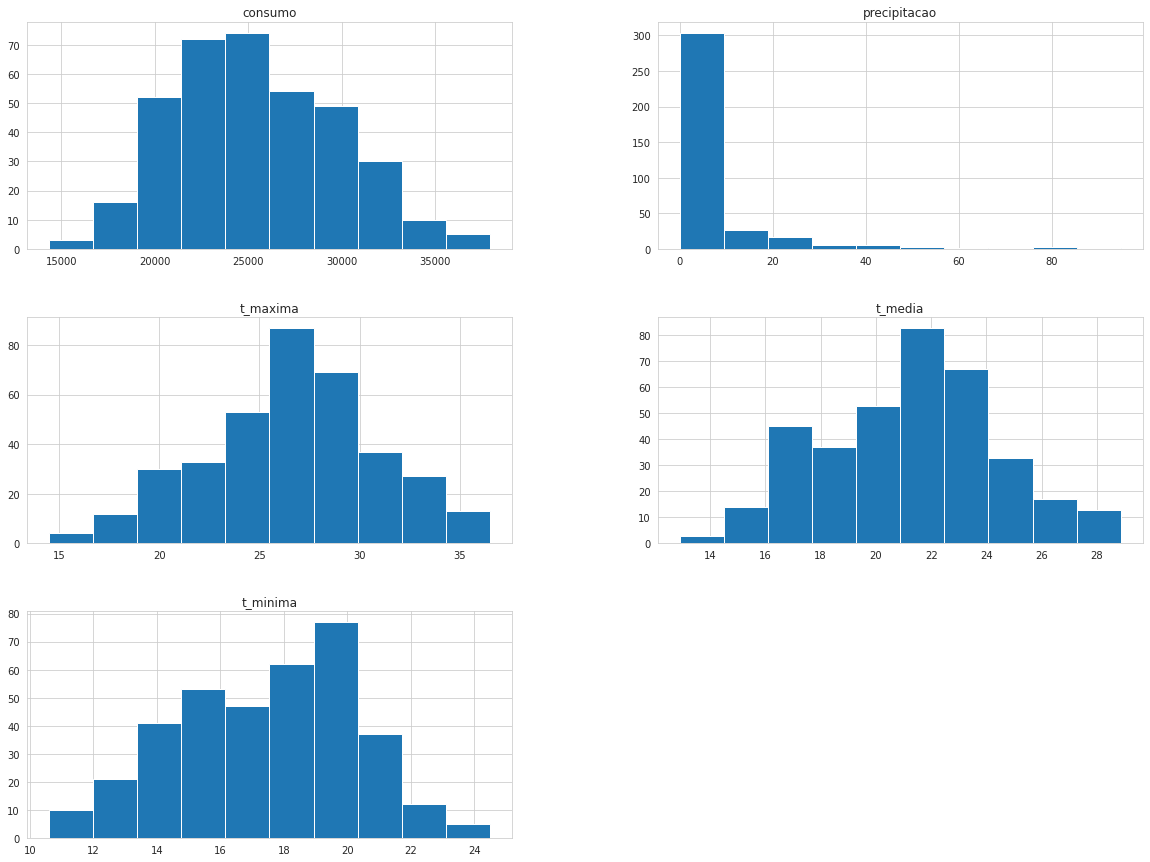

In [18]:
# GRÁFICO COM A DISTRIBUIÇÃO DOS VALORES
gr_dist = df.hist(figsize = (20,15))

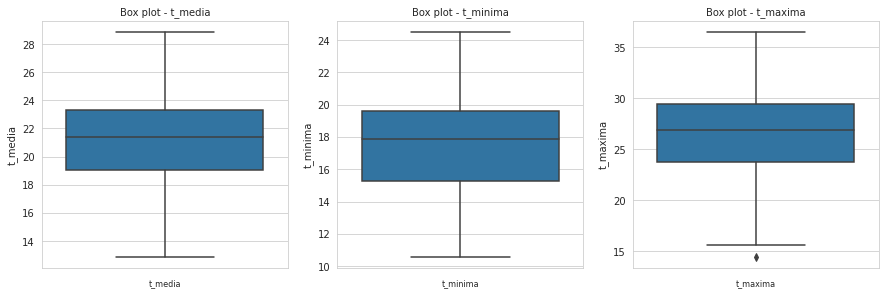

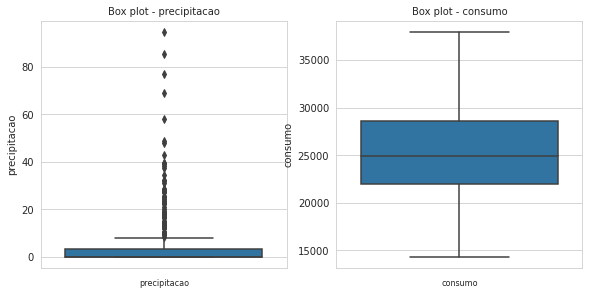

In [35]:
# BOX-PLOT DAS VARIÁVEIS EM BUSCA DE OUTLIERS
v_cols2 = ['t_media', 't_minima', 't_maxima', 'precipitacao','consumo']
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(v_cols2):
    if ix <= 3:
      ax1 = fig.add_subplot(2,3,ix)
      sns.boxplot(y=df[c], ax=ax1)
      ax1.set_title('Box plot - {}'.format(c), fontsize=10)
      ax1.set_xlabel(c, fontsize=8)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [0]:
# VERIFICANDO A CORRELAÇÃO ENTRE AS VARIÁVEIS
plt.figure(figsize=(15,3))
sns.heatmap(df.corr(),annot=True)

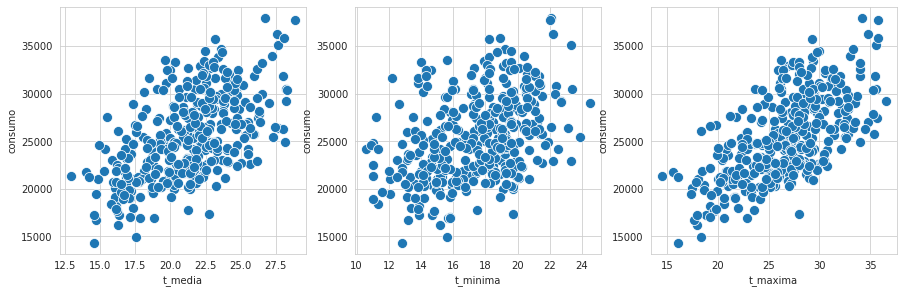

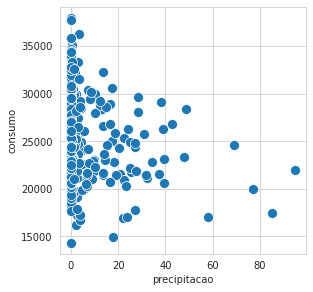

In [36]:
# VERIFICANDO A RELAÇÃO DAS VARIÁVEIS INDEPENDENTES COM A VARIÁVEL DEPENDENTE
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(v_cols2):
    if ix <= 3:
      if c != v_answer:
        ax1 = fig.add_subplot(2,3,ix)
        sns.scatterplot(x=df[c],y=df[v_answer],s=100)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [85]:
# REGRESSÃO LINEAR SIMPLES
lr = LinearRegression()

for i in v_cols2:
  v_x = df[i].values.reshape(-1,1)
  lr.fit(v_x,df[v_answer])
  v_erro = mean_squared_error(df.consumo,lr.predict(v_x))
  print(i.upper(),'\nMeu erro foi de\t',round(v_erro,2),'\nNa mesma ordem\t',round(np.sqrt(v_erro),2),'\n\t\t',lr.coef_,lr.intercept_,'\n')

T_MEDIA 
Meu erro foi de	 12927108.73 
Na mesma ordem	 3595.43 
		 [794.882537] 8528.907283985503 

T_MINIMA 
Meu erro foi de	 16326104.98 
Na mesma ordem	 4040.56 
		 [610.96562166] 14733.070429821966 

T_MAXIMA 
Meu erro foi de	 11328230.34 
Na mesma ordem	 3365.74 
		 [654.845584] 7974.9393794593125 

PRECIPITACAO 
Meu erro foi de	 18574696.79 
Na mesma ordem	 4309.84 
		 [-68.649986] 25758.12135191357 

CONSUMO 
Meu erro foi de	 0.0 
Na mesma ordem	 0.0 
		 [1.] -7.275957614183426e-12 



In [84]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
for i in range(10):
  print(f'Predizendo para x ={i} -- Resultado {lr.predict([[i]])}')

Predizendo para x =0 -- Resultado [7974.93937946]
Predizendo para x =1 -- Resultado [8629.78496346]
Predizendo para x =2 -- Resultado [9284.63054746]
Predizendo para x =3 -- Resultado [9939.47613146]
Predizendo para x =4 -- Resultado [10594.32171545]
Predizendo para x =5 -- Resultado [11249.16729945]
Predizendo para x =6 -- Resultado [11904.01288345]
Predizendo para x =7 -- Resultado [12558.85846745]
Predizendo para x =8 -- Resultado [13213.70405145]
Predizendo para x =9 -- Resultado [13868.54963545]


<function matplotlib.pyplot.show>

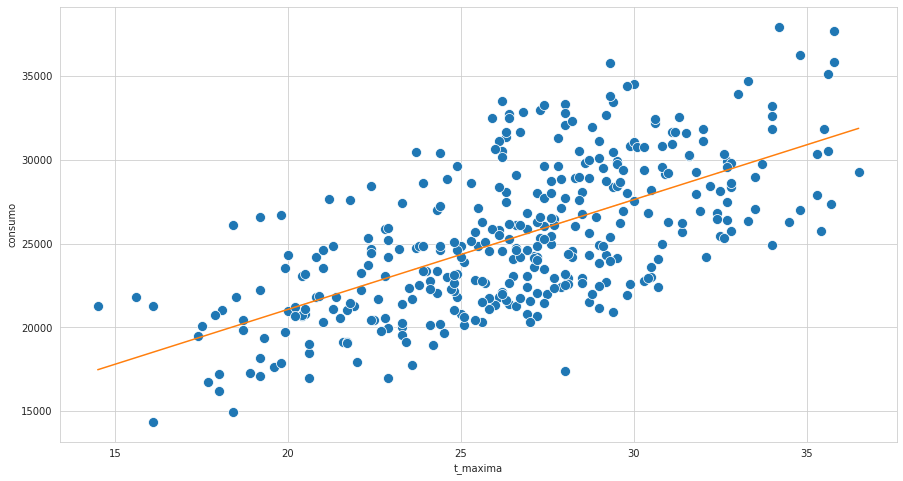

In [59]:
# PLOTAR UM GRÁFICO DE REGRESSÃO
lr.fit(df['t_maxima'].values.reshape(-1,1),df.consumo)
y_pred= [lr.predict([[x]])[0] for x in df.t_maxima]

plt.figure(figsize=(15,8))
sns.scatterplot(x=df.t_maxima,y=df.consumo,s=100)
sns.lineplot(x=df.t_maxima,y=y_pred,color='tab:orange')
plt.show

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.consumo,lr.predict((df.t_maxima).values.reshape(-1,1)))

11328230.341613485

In [0]:
# ENCONTRANDO A MÉTRICA MSE --
def nosso_mean(y_real,y_pred):
  return((y_real - y_pred)**2).mean()

In [0]:
# CRIAÇÃO DE NOVAS FEATURES
df['data_dia']        = df['data'].dt.day
df['data_mes']        = df['data'].dt.month
df['data_nrsemana']   = df['data'].dt.week
df['data_diasemana']  = df['data'].dt.dayofweek

# PONTOS ADICIONAIS QUE PODEM SER ÚTEIS

In [0]:
# OPÇÕES DE TRANSFORMAR OS VALORES DE UMA COLUNA EM LETRAS MINUSCULAS
df['A'] = df['A'].str.lower()
df['A'].apply(lambda x: x.lower()) 
data.columns = [x.lower() for x in data.columns]
df.columns = map(str.lower, df.columns)

In [0]:
# GRÁFICO DE DISTRIBUIÇÃO, MAS ME PARECE SER MAIS INTERESSANTE PARA VARIÁVEIS CATEGORICAS
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df.columns):
    if ix <= 3:
        if c != 'Outcome':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df, x=c, ax = ax1)
            #ax2 = fig.add_subplot(2,3,ix+3)
            #sns.boxplot(data=df, x=c, y='Outcome', ax=ax2)
            #sns.violinplot(data=df, x=c, y='Outcome', ax=ax2)
            #sns.swarmplot(data = df, x=c, y ='Outcome', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [0]:
#@title Apresentando um relatório geral dos dados e ordenando pelo percentual de missing values
df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_inc_na', 'values_count', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_inc_na'] = len(list(df[c].unique()))
    tmp['values_count'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    df_stats = df_stats.append(tmp)

df_stats.sort_values(by = 'pct_miss', inplace = True, ascending = True)    
df_stats

In [0]:
# VERIFICA A RELAÇÃO DA VARIÁVEL INDEPENDENTE COM A VARIÁVEL RESPOSTA
sns.boxplot(data = df, x='age', y='outcome')

In [0]:
# GRÁFICO PARA IDENTIFICAÇÃO DE OUTLIERS
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = v_cols

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [0]:
# Keep only the rows with at least 4 non-na values
df.dropna(thresh = 4,inplace = True)